# 1. Importing Libraries

In [307]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats import norm
import random
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, PowerTransformer

from warnings import filterwarnings
filterwarnings('ignore')


# 2. Importing Dataset

In [308]:
# Importing data:
#, index_col='id'
df_train = pd.read_csv('../Datasets/raw_datasets/train.csv', index_col='Id')
df_test = pd.read_csv('../Datasets/raw_datasets/test.csv', index_col='Id')
submission  = pd.read_csv('../Datasets/raw_datasets/sample_submission.csv')

# Making a deep copy of the data
data_copy = df_train.copy(deep = True)

# Putting the datas in the list, so various operations can be performed on both datasets. (For Convenience)
#datas = [df_train_copy, df_test]
datas = [('Training Dataset', data_copy), ('Testing Dataset', df_test)]

# 3. Exploratory Data Analysis (EDA):

## 3.1 Meet and Greet with the Data (Preliminary Data Exploration):

In [309]:
# Printing the first few entries of datasets.
pd.set_option('display.max_columns', None)

print("Training Dataset Sample: \n")
display(data_copy.head())

print("\n\nTesting Dataset Sample:\n")
display(df_test.head())

print("\n\nSubmission Dataset Sample: \n")
display(submission.head())

Training Dataset Sample: 



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000




Testing Dataset Sample:



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal




Submission Dataset Sample: 



,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [310]:
# A brief overview of data
print("\n\nA brief overview of Training Dataset:\n")
print(data_copy.info())

print("\n\nA brief overview of Testing Dataset:\n")
print(df_test.info())



A brief overview of Training Dataset:

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1

In [311]:
# A Brief Statistical Overview:
pd.set_option('display.max_rows', None)

display("A brief statistical overview of Training Dataset:", data_copy.describe(include='all').T)

display("A brief statistical overview of Testing Dataset:", df_test.describe(include='all').T)

'A brief statistical overview of Training Dataset:'

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,NaN,NaN,NaN,56.89726,42.300571,20.0,20.0,50.0,70.0,190.0
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.0,NaN,NaN,NaN,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotConfig,1460,5,Inside,1052,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'A brief statistical overview of Testing Dataset:'

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MSSubClass,1459.0,NaN,NaN,NaN,57.378341,42.74688,20.0,20.0,50.0,70.0,190.0
MSZoning,1455,5,RL,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1232.0,NaN,NaN,NaN,68.580357,22.376841,21.0,58.0,67.0,80.0,200.0
LotArea,1459.0,NaN,NaN,NaN,9819.161069,4955.517327,1470.0,7391.0,9399.0,11517.5,56600.0
Street,1459,2,Pave,1453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,107,2,Grvl,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1459,4,Reg,934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1459,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1457,1,AllPub,1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotConfig,1459,5,Inside,1081,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [312]:
# Finding Duplicates
print(f"Duplicates in Training dataset: {data_copy.duplicated().sum()}, ({np.round(100*data_copy.duplicated().sum()/len(data_copy),1)}%)")
print(f"Duplicates in Testing dataset: {df_test.duplicated().sum()}, ({np.round(100*df_test.duplicated().sum()/len(df_test),1)}%)")

Duplicates in Training dataset: 0, (0.0%)
Duplicates in Testing dataset: 0, (0.0%)


In [313]:
# Finding Missing Values

print("Training Dataset:\nMissing/Null values across columns:\n")
print(data_copy.isna().sum())
# print(data_copy.isna().sum()[data_copy.isna().sum() > 0])

print("\n\nTesting Dataset:\nMissing/Null values across columns:\n")
print(df_test.isna().sum())
# print(df_test.isna().sum()[df_test.isna().sum() > 0])

Training Dataset:
Missing/Null values across columns:

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0

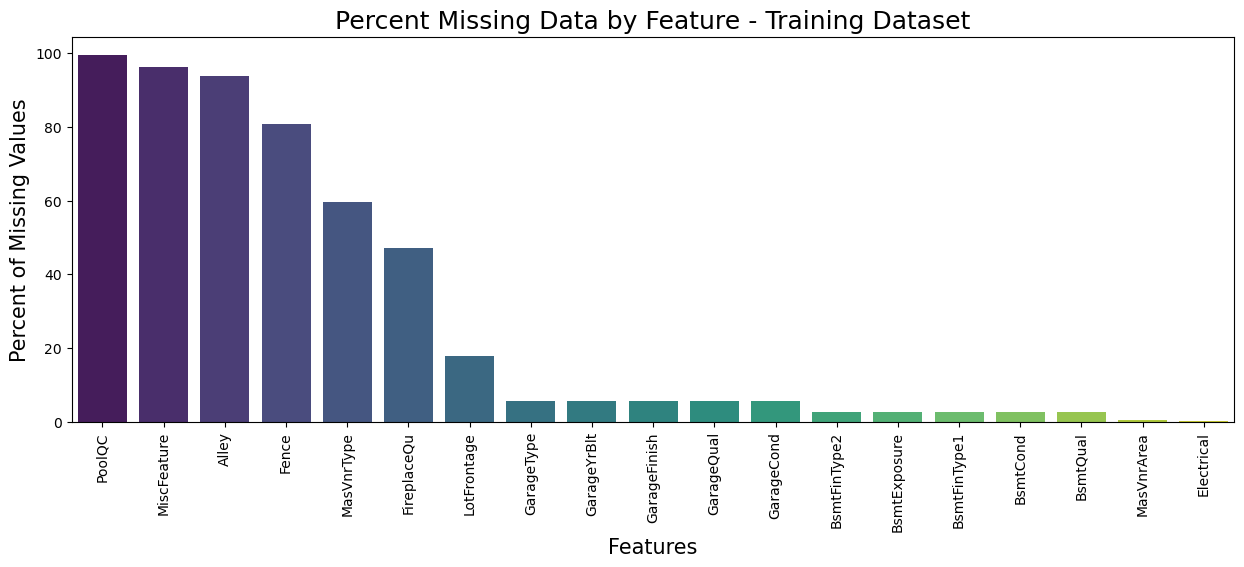

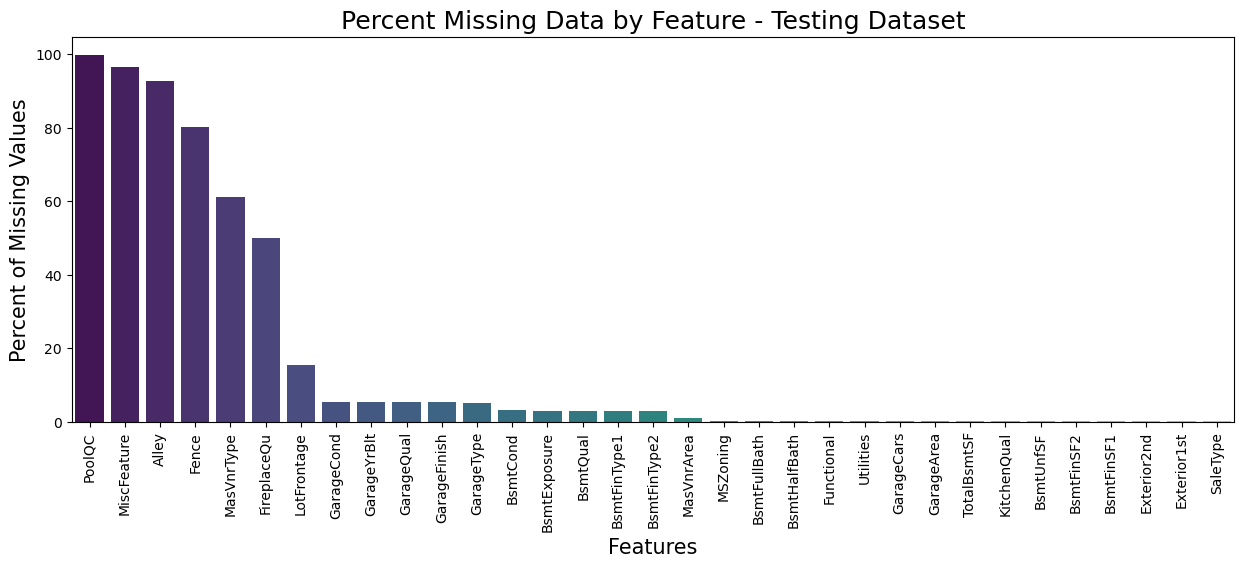

In [314]:
# Missing data Percentage Barplot

# Function to plot missing data percentage
def plot_missing_data(data, dataset_name):
    miss_data_percent = (data.isna().sum() / len(data)) * 100
    miss_data_percent = miss_data_percent.drop(miss_data_percent[miss_data_percent == 0].index).sort_values(ascending=False)
    
    if not miss_data_percent.empty:
        plt.figure(figsize=(15, 5))
        sns.barplot(x=miss_data_percent.index, y=miss_data_percent, palette="viridis")
        plt.xticks(rotation=90)
        plt.xlabel('Features', fontsize=15)
        plt.ylabel('Percent of Missing Values', fontsize=15)
        plt.title(f'Percent Missing Data by Feature - {dataset_name}', fontsize=18)
        plt.show()
    else:
        print(f"No missing data in {dataset_name}")

# Plot for each dataset
for name, data in datas:
    plot_missing_data(data, name)

In [315]:
# Convert the ordered categorical features
ordered_categories = {
    'OverallQual': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'OverallCond': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'LotShape': ['IR3', 'IR2', 'IR1', 'Reg'],
    'LandSlope': ['Sev', 'Mod', 'Gtl'],
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['NA', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    'GarageFinish': ['NA', 'Unf', 'RFn', 'Fin'],
    'GarageQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PavedDrive': ['N', 'P', 'Y'],
}

for name, data in datas:
    for feature, categories in ordered_categories.items():
        data[feature] = pd.Categorical(data[feature], categories=categories, ordered=True)

# Convert the unordered categorical features
unordered_features = [
    'MSSubClass', 'MSZoning', 'Street', 'LandContour', 'Utilities',
    'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
    'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition'
]

for name, data in datas:
    for feature in unordered_features:
        data[feature] = data[feature].astype('category')

# Combining both of them to get all Categorical Features
categorical_features = list(ordered_categories.keys()) + unordered_features 

print(categorical_features)

['OverallQual', 'OverallCond', 'LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MSSubClass', 'MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition']


In [316]:
# Define features to drop
drop_features = ['PoolQC', 'MiscFeature', 'MiscVal', 'Alley', 'Fence', 'FireplaceQu']

# Drop features from each dataset
for name, data in datas:
  data.drop(drop_features, axis=1, inplace=True)

In [317]:
# Numerical Features name as a list
numerical_features = data_copy.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_features)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold', 'SalePrice']


### Filling Missing Values LotFrontage

In [318]:
for name, data in datas:

    LotFrontage_missdata_bef = data['LotFrontage'].isna().sum()

    # Step 1: Calculate the count of each BldgType within each Neighborhood
    neighborhood_lotfrontage_counts = data_copy.groupby(['Neighborhood', 'BldgType'])['LotFrontage'].size().unstack().fillna(0)

    # Step 2: Determine the BldgType with the largest count for each Neighborhood
    predominant_bldgtype = neighborhood_lotfrontage_counts.idxmax(axis=1)

    # Step 3: Calculate the median LotFrontage for each predominant BldgType within each Neighborhood
    predominant_bldgtype_median_lotfrontage = {}
    for neighborhood in data['Neighborhood'].unique():
        predominant_type = predominant_bldgtype.loc[neighborhood]
        median_lotfrontage = data.loc[(data['Neighborhood'] == neighborhood) & (data['BldgType'] == predominant_type), 'LotFrontage'].median()
        predominant_bldgtype_median_lotfrontage[neighborhood] = median_lotfrontage

    # Step 4: Fill missing LotFrontage values based on the calculated medians
    for neighborhood, median_lotfrontage in predominant_bldgtype_median_lotfrontage.items():
        # Filter rows with missing LotFrontage in this neighborhood
        missing_lotfrontage_index = data[(data['Neighborhood'] == neighborhood) & (data['LotFrontage'].isna())].index
        
        # Fill missing values for these specific rows
        data.loc[missing_lotfrontage_index, 'LotFrontage'] = median_lotfrontage

    LotFrontage_missdata_aft = data['LotFrontage'].isna().sum()

     # Print number of missing values left
    print(f'\n\n\n{name}["LotFrontage"] missing values:\n')
    print('Number of missing values in feature LotFrontage before imputing:',LotFrontage_missdata_bef)
    print('Number of missing values in feature LotFrontage after imputing:',LotFrontage_missdata_aft)




Training Dataset["LotFrontage"] missing values:

Number of missing values in feature LotFrontage before imputing: 259
Number of missing values in feature LotFrontage after imputing: 0



Testing Dataset["LotFrontage"] missing values:

Number of missing values in feature LotFrontage before imputing: 227
Number of missing values in feature LotFrontage after imputing: 0


### Filling Missing Values Garage Features

**Strategy for filling missing Garage Features**

From features description, we came to know that for the rows with NA value means no Garage.

- GarageQual: Garage quality

    - Ex	Excellent
    - Gd	Good
    - TA	Typical/Average
    - Fa	Fair
    - Po	Poor
    - NA	No Garage
		
- GarageCond: Garage condition

    - Ex	Excellent
    - Gd	Good
    - TA	Typical/Average
    - Fa	Fair
    - Po	Poor
    - NA	No Garage

Upon checking the unique values across the above Garage Features, we get:

['TA', NaN, 'Fa', 'Gd', 'Po']<br>
Categories (6, object): ['NA' < 'Po' < 'Fa' < 'TA' < 'Gd' < 'Ex']<br>
['TA', NaN, 'Fa', 'Gd', 'Po', 'Ex']<br>
Categories (6, object): ['NA' < 'Po' < 'Fa' < 'TA' < 'Gd' < 'Ex']

Based on this we observed that, Instead of allocating **'NA'** for *'No Garage'* they have been given (missing) **NaN** value.

**So, we will put 'NA' value for all missing values across categorical Garage Features.**

Also, we found that they have missing values across same rows for both Training dataset and Testing Dataset (except for Testing dataset 2 rows (index 2127 and index 2577) for which all Garage features are missing except GarageType.)

Similarly, For Numerical Garage Features for both Training and Testing Dataset, the missing values are as follows:

- Training Dataset:
    - GarageYrBlt    81 Missing Values

- Testing Dataset:
    - GarageYrBlt    76 Missing Values
    - GarageCars     1 Missing value at index 2577
    - GarageArea     1 Missing value at index 2577

We confirmed that feature GarageYrBlt missing values are for the houses with *NO GARAGE*, So we'll impute **0** for those.

In [320]:
# Filling Missing values across categorical garage features
garage_categorical_features = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

for name, data in datas:
    data['GarageType'] = data['GarageType'].cat.add_categories(['NA'])
    for feature in garage_categorical_features:
        missing_value_bef = data[feature].isna().sum()
        data[feature] = data[feature].fillna('NA')
        missing_value_aft = data[feature].isna().sum()
        # Print number of missing values left
        print(f'\n\n\n{name}["{feature}"] missing values:\n')
        print(f'Number of missing values in feature {feature} before imputing:', missing_value_bef)
        print(f'Number of missing values in feature {feature} after imputing:', missing_value_aft)

# Filling Missing values across GarageYrBlt (Numerical Feature)
for name, data in datas:
    missing_value_bef = data["GarageYrBlt"].isna().sum()
    data["GarageYrBlt"] = data["GarageYrBlt"].fillna(0)
    data['GarageYrBlt'] = data['GarageYrBlt'].astype(int)
    # Update the datas list with the new df_test
    if name == "Training Dataset":
        data_copy = data
        datas = [('Training Dataset', data_copy), ('Testing Dataset', df_test)]
    elif name == "Testing Dataset":
        df_test = data
        datas = [('Training Dataset', data_copy), ('Testing Dataset', df_test)]
        
    missing_value_aft = data["GarageYrBlt"].isna().sum()
    # Print number of missing values left
    print(f'\n\n\n{name}["{"GarageYrBlt"}"] missing values:\n')
    print(f'Number of missing values in feature "GarageYrBlt" before imputing:', missing_value_bef)
    print(f'Number of missing values in feature "GarageYrBlt" after imputing:', missing_value_aft)





Training Dataset["GarageType"] missing values:

Number of missing values in feature GarageType before imputing: 81
Number of missing values in feature GarageType after imputing: 0



Training Dataset["GarageFinish"] missing values:

Number of missing values in feature GarageFinish before imputing: 81
Number of missing values in feature GarageFinish after imputing: 0



Training Dataset["GarageQual"] missing values:

Number of missing values in feature GarageQual before imputing: 81
Number of missing values in feature GarageQual after imputing: 0



Training Dataset["GarageCond"] missing values:

Number of missing values in feature GarageCond before imputing: 81
Number of missing values in feature GarageCond after imputing: 0



Testing Dataset["GarageType"] missing values:

Number of missing values in feature GarageType before imputing: 76
Number of missing values in feature GarageType after imputing: 0



Testing Dataset["GarageFinish"] missing values:

Number of missing values in 

### Filling Missing Values Basement Features

**Strategy for filling missing Basement Features**

From features description, we came to know that for the rows with NA value means no Basement.

- BsmtQual: Evaluates the height of the basement

    - Ex	Excellent (100+ inches)
    - Gd	Good (90-99 inches)
    - TA	Typical (80-89 inches)
    - Fa	Fair (70-79 inches)
    - Po	Poor (<70 inches)
    - NA	No Basement
		
- BsmtCond: Evaluates the general condition of the basement


    - Ex	Excellent
    - Gd	Good
    - TA	Typical - slight dampness allowed
    - Fa	Fair - dampness or some cracking or settling
    - Po	Poor - Severe cracking, settling, or wetness
    - NA	No Basement

Upon checking the unique values across the above mentioned Basement Features, we get:

['Gd', 'TA', 'Ex', NaN, 'Fa']<br>
Categories (6, object): ['NA' < 'Po' < 'Fa' < 'TA' < 'Gd' < 'Ex']<br>
['TA', 'Gd', NaN, 'Fa', 'Po']<br>
Categories (6, object): ['NA' < 'Po' < 'Fa' < 'TA' < 'Gd' < 'Ex']

Based on this we observed that, Instead of allocating **'NA'** for *'No Basement'* they have been given (missing) **NaN** value.

**So, we will put 'NA' value for all missing values across Categorical Basement Features.**

Also, we found that for both Training Dataset and Testing Dataset, they have missing values across Categorical Features ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'] of same rows as follows: 

- Number of rows with missing values across all specified features (Training Dataset): 37
- Number of rows with missing values across all specified features (Testing Dataset): 42

Except for Training dataset 2 rows (index 333 and index 949) for which all Basement features are missing except 'BsmtExposure' and 'BsmtFinType2'. <br>
**So we will delete these 2 rows (index 333 and index 949) from Training Dataset**<br><br>

Similarly, for Testing dataset 7 rows (index 1488, index 2041, index 2186, index 2218, index 2219, index 2349, index 2525) for which all Basement features are missing except 'BsmtQual', 'BsmtCond', 'BsmtExposure'.<br>
**So we will delete these 7 rows (index 1488, index 2041, index 2186, index 2218, index 2219, index 2349, index 2525) from Testing Dataset**<br><br>

Similarly, For Numerical Basement Features, the missing values are only for the Testing Dataset:

- Testing Dataset:
    - BsmtFinSF1      1
    - BsmtFinSF2      1
    - BsmtUnfSF       1
    - TotalBsmtSF     1
    - BsmtFullBath    2
    - BsmtHalfBath    2

We confirmed that these numerical features have missing values for the houses with *NO BASEMENT*, So we'll impute **0** for those.

In [321]:
for name, data in datas:
    # Check for rows where all specified features are missing
    missing_all_features = data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isnull().all(axis=1)

    # Count the number of such rows
    num_missing_rows = missing_all_features.sum()

    print(f"Number of rows with missing values across all specified features of {name}: {num_missing_rows}")

Number of rows with missing values across all specified features of Training Dataset: 37
Number of rows with missing values across all specified features of Testing Dataset: 42


In [322]:
df_test.loc[[2349, 2525], ['BsmtFullBath', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']]

,BsmtFullBath,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
Id,,,,,
2349,0.0,TA,NaN,Unf,Unf
2525,0.0,NaN,Av,ALQ,Unf


In [323]:
# Droping rows with index=[333, 949] from training dataset
basement_categorical_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
basement_numerical_features = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']

# Print initial missing values
print(f'Training Dataset Basement Features missing values before dropping:\n')
print(data_copy[basement_categorical_features + basement_numerical_features].isna().sum())

# Drop rows from data_copy
print("\nShape of Train Dataset before Droping 2 rows: ", data_copy.shape)
data_copy = data_copy.drop(index=[333, 949])
print("\nShape of Train Dataset after Droping 2 rows: ", data_copy.shape)

# Update the datas list with the new df_test
datas = [('Training Dataset', data_copy), ('Testing Dataset', df_test)]

# Print initial missing values
print(f'Training Dataset Basement Features missing values after dropping:\n')
print(data_copy[basement_categorical_features + basement_numerical_features].isna().sum())


Training Dataset Basement Features missing values before dropping:

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
BsmtFullBath     0
BsmtHalfBath     0
dtype: int64

Testing Dataset Basement Features missing values before dropping:

BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinType2    42
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
dtype: int64

Shape of Train Dataset before Droping 2 rows:  (1460, 74)

Shape of Train Dataset after Droping 2 rows:  (1458, 74)

Shape of Test Dataset before Droping 7 rows:  (1457, 73)

Shape of Test Dataset after Droping 7 rows:  (1450, 73)

Training Dataset Basement Features missing values after dropping:

BsmtQual        37
BsmtCond        37
BsmtExposure    37
BsmtFinType1    37
BsmtFinType2    37
BsmtFinSF1       0
BsmtF

In [324]:
# Filling Missing values across categorical basement features
basement_categorical_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

for name, data in datas:
    for feature in basement_categorical_features:
        missing_value_bef = data[feature].isna().sum()
        data[feature] = data[feature].fillna('NA')
        missing_value_aft = data[feature].isna().sum()
        # Print number of missing values left
        print(f'\n\n\n{name}["{feature}"] missing values:\n')
        print(f'Number of missing values in feature {feature} before imputing:', missing_value_bef)
        print(f'Number of missing values in feature {feature} after imputing:', missing_value_aft)


basement_numerical_features = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']

# Filling Missing values across GarageYrBlt (Numerical Feature)
for feature in basement_numerical_features:
    missing_value_bef = df_test[feature].isna().sum()
    df_test[feature] = df_test[feature].fillna(0)
    missing_value_aft = df_test[feature].isna().sum()
    # Print number of missing values left
    print(f'\n\n\nTesting Dataset["{feature}"] missing values:\n')
    print(f'Number of missing values in feature {feature} before imputing:', missing_value_bef)
    print(f'Number of missing values in feature {feature} after imputing:', missing_value_aft)





Training Dataset["BsmtQual"] missing values:

Number of missing values in feature BsmtQual before imputing: 37
Number of missing values in feature BsmtQual after imputing: 0



Training Dataset["BsmtCond"] missing values:

Number of missing values in feature BsmtCond before imputing: 37
Number of missing values in feature BsmtCond after imputing: 0



Training Dataset["BsmtExposure"] missing values:

Number of missing values in feature BsmtExposure before imputing: 37
Number of missing values in feature BsmtExposure after imputing: 0



Training Dataset["BsmtFinType1"] missing values:

Number of missing values in feature BsmtFinType1 before imputing: 37
Number of missing values in feature BsmtFinType1 after imputing: 0



Training Dataset["BsmtFinType2"] missing values:

Number of missing values in feature BsmtFinType2 before imputing: 37
Number of missing values in feature BsmtFinType2 after imputing: 0



Testing Dataset["BsmtQual"] missing values:

Number of missing values in fea

MsnVnr

In [325]:
for name, data in datas:
    missing_value_bef = data["MasVnrArea"].isna().sum()
    data.loc[(data["MasVnrArea"].isna()) & (data["MasVnrType"].isna()), "MasVnrArea"] = 0
    missing_value_aft = data["MasVnrArea"].isna().sum()
    # Print number of missing values left
    print(f'\n\n\n{name}["MasVnrArea"] missing values:\n')
    print(f'Number of missing values in feature "MasVnrArea" before imputing:', missing_value_bef)
    print(f'Number of missing values in feature "MasVnrArea" after imputing:', missing_value_aft)




Training Dataset["MasVnrArea"] missing values:

Number of missing values in feature "MasVnrArea" before imputing: 8
Number of missing values in feature "MasVnrArea" after imputing: 0



Testing Dataset["MasVnrArea"] missing values:

Number of missing values in feature "MasVnrArea" before imputing: 15
Number of missing values in feature "MasVnrArea" after imputing: 0


In [326]:
for name, data in datas:
    data['MasVnrType'] = data['MasVnrType'].astype('category').cat.add_categories(['None'])
    missing_value_bef = data["MasVnrType"].isna().sum()
    data.loc[(data["MasVnrType"].isna()) & (data["MasVnrArea"] == 0), "MasVnrType"] = "None"
    missing_value_aft = data["MasVnrType"].isna().sum()
    # Print number of missing values left
    print(f'\n\n\n{name}["MasVnrType"] missing values:\n')
    print(f'Number of missing values in feature "MasVnrType" before imputing:', missing_value_bef)
    print(f'Number of missing values in feature "MasVnrType" after imputing:', missing_value_aft)




Training Dataset["MasVnrType"] missing values:

Number of missing values in feature "MasVnrType" before imputing: 872
Number of missing values in feature "MasVnrType" after imputing: 5



Testing Dataset["MasVnrType"] missing values:

Number of missing values in feature "MasVnrType" before imputing: 888
Number of missing values in feature "MasVnrType" after imputing: 3


In [327]:
for name, data in datas:
    missing_value_bef = data["MasVnrType"].isna().sum()
   
    # Imputing missing values in "MasVnrType" with "None"
    data = data["MasVnrType"].fillna("None")

    # Update the datas list with the new df_test
    if name == "Training Dataset":
        data_copy = data
        datas = [('Training Dataset', data_copy), ('Testing Dataset', df_test)]
    elif name == "Testing Dataset":
        df_test = data
        datas = [('Training Dataset', data_copy), ('Testing Dataset', df_test)]

    missing_value_aft = data["MasVnrType"].isna().sum()
    # Print number of missing values left
    print(f'\n\n\n{name}["MasVnrType"] missing values:\n')
    print(f'Number of missing values in feature "MasVnrType" before dropping rows:', missing_value_bef)
    print(f'Number of missing values in feature "MasVnrType" after dropping rows:', missing_value_aft)




Shape of Training Dataset before dropping rows across remaining missing values of MasVnrType:  (1458, 74)
Shape of Training Dataset after dropping rows across remaining missing values of MasVnrType:  (1453, 74)



Training Dataset["MasVnrType"] missing values:

Number of missing values in feature "MasVnrType" before dropping rows: 5
Number of missing values in feature "MasVnrType" after dropping rows: 0


Shape of Testing Dataset before dropping rows across remaining missing values of MasVnrType:  (1450, 73)
Shape of Testing Dataset after dropping rows across remaining missing values of MasVnrType:  (1447, 73)



Testing Dataset["MasVnrType"] missing values:

Number of missing values in feature "MasVnrType" before dropping rows: 3
Number of missing values in feature "MasVnrType" after dropping rows: 0


Electrical

In [328]:
missing_value_bef = data_copy["Electrical"].isna().sum()

# Dropping rows with remaining missing values in "Electrical"
print(f"\n\nShape of Training Dataset before dropping rows across remaining missing values of Electrical: ", data_copy.shape)
data_copy = data_copy.dropna(subset=['Electrical'])
print(f"Shape of Training Dataset after dropping rows across remaining missing values of Electrical: ", data_copy.shape)

# Update the datas list with the new df_test
datas = [('Training Dataset', data_copy), ('Testing Dataset', df_test)]

missing_value_aft = data_copy["Electrical"].isna().sum()
# Print number of missing values left
print(f'\n\n\nTraining Dataset["Electrical"] missing values:\n')
print(f'Number of missing values in feature "Electrical" before dropping rows:', missing_value_bef)
print(f'Number of missing values in feature "Electrical" after dropping rows:', missing_value_aft)



Shape of Training Dataset before dropping rows across remaining missing values of Electrical:  (1453, 74)
Shape of Training Dataset after dropping rows across remaining missing values of Electrical:  (1452, 74)



Training Dataset["Electrical"] missing values:

Number of missing values in feature "Electrical" before dropping rows: 1
Number of missing values in feature "Electrical" after dropping rows: 0


In [329]:
miss_values_feats_df_test = ["MSZoning", "Utilities", "Exterior1st", "Exterior2nd", "KitchenQual", "Functional", "SaleType"]

missing_value_bef = df_test[miss_values_feats_df_test].isna().sum()

# Dropping rows with remaining missing values in miss_values_feats_df_test
print(f"\n\nShape of Training Dataset before dropping rows across remaining missing values of miss_values_feats_df_test: ", df_test.shape)
df_test = df_test.dropna(subset=miss_values_feats_df_test)
print(f"Shape of Training Dataset after dropping rows across remaining missing values of miss_values_feats_df_test: ", df_test.shape)

# Update the datas list with the new df_test
datas = [('Training Dataset', data_copy), ('Testing Dataset', df_test)]

missing_value_aft = df_test[miss_values_feats_df_test].isna().sum()
# Print number of missing values left
print(f'\n\n\nTraining Dataset[miss_values_feats_df_test] missing values:\n')
print(f'Number of missing values in feature miss_values_feats_df_test before dropping rows:\n', missing_value_bef)
print(f'Number of missing values in feature miss_values_feats_df_test after dropping rows:\n', missing_value_aft)



Shape of Training Dataset before dropping rows across remaining missing values of miss_values_feats_df_test:  (1447, 73)
Shape of Training Dataset after dropping rows across remaining missing values of miss_values_feats_df_test:  (1438, 73)



Training Dataset[miss_values_feats_df_test] missing values:

Number of missing values in feature miss_values_feats_df_test before dropping rows:
 MSZoning       4
Utilities      2
Exterior1st    1
Exterior2nd    1
KitchenQual    1
Functional     2
SaleType       1
dtype: int64
Number of missing values in feature miss_values_feats_df_test after dropping rows:
 MSZoning       0
Utilities      0
Exterior1st    0
Exterior2nd    0
KitchenQual    0
Functional     0
SaleType       0
dtype: int64


In [330]:
for name, data in datas:
    print(f"{name}:\nMissing/Null values across columns:\n")
    print(data.isna().sum())

Training Dataset:
Missing/Null values across columns:

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr  

In [331]:
# num_cols = 4  # Number of columns in subplot grid
# num_rows = (len(numerical_features) + num_cols - 1) // num_cols  # Calculate number of rows needed

# # Set the figure size with equal width and height for square plots
# plt.figure(figsize=(20, num_rows * 4))  # Adjust height accordingly

# # Plot histograms
# for i, col in enumerate(numerical_features, 1):
#     plt.subplot(num_rows, num_cols, i)
#     sns.histplot(data_copy[col], kde=True)
    
#     # Add title with bold font and adjust margins
#     plt.title(f'Histogram of {col}', fontsize=14, fontweight='bold')
    
#     # Adjust the margin above the title for subplots in the second row and beyond
#     if i > num_cols:
#         plt.gca().title.set_position([0.5, 1.05])  # Move the title up slightly

# plt.suptitle(f"Histograms for Training Dataset's Numerical Features", fontsize=16, fontweight='bold')
# plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for suptitle
# plt.show()


In [332]:
# num_cols = 4  # Number of columns in subplot grid

# num_features = len(categorical_features)
# num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows needed

# # Set the figure size with equal width and height for square plots
# plt.figure(figsize=(20, num_rows * 4))  # Adjust height accordingly

# # Plot count plots for each categorical feature
# for i, feature in enumerate(categorical_features, 1):
#     plt.subplot(num_rows, num_cols, i)
#     sns.countplot(x=feature, data=data_copy) 
    
#     # Add title with bold font and adjust margins
#     plt.title(f'Count Plot of {feature}', fontsize=14, fontweight='bold')
    
#     # Adjust the margin above the title for subplots in the second row and beyond
#     if i > num_cols:
#         plt.gca().title.set_position([0.5, 1.05])  # Move the title up slightly

#     plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# plt.suptitle(f"CountPlots for Training Dataset's Categorical Features", fontsize=16, fontweight='bold')
# plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for suptitle
# plt.show()

In [333]:
# num_cols = 4  # Number of columns in subplot grid

# # Loop through each dataset in datas

# num_features = len(categorical_features)
# num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows needed

# # Set the figure size with equal width and height for square plots
# plt.figure(figsize=(20, num_rows * 4))  # Adjust height accordingly

# # Plot count plots for each categorical feature
# for i, feature in enumerate(categorical_features, 1):
#     plt.subplot(num_rows, num_cols, i)
#     sns.boxplot(x=feature, y=data_copy['SalePrice'], data=data_copy)

    
#     # Add title with bold font and adjust margins
#     plt.title(f'Box Plot of SalePrice by {feature}', fontsize=14, fontweight='bold')
    
#     # Adjust the margin above the title for subplots in the second row and beyond
#     if i > num_cols:
#         plt.gca().title.set_position([0.5, 1.05])  # Move the title up slightly

#     plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# plt.suptitle(f"Box Plots for Training Dataset's Categorical Features", fontsize=16, fontweight='bold')
# plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for suptitle
# plt.show()

In [334]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Calculate variance for training and testing datasets
train_var = data_copy[numerical_features].var()
test_var = df_test[[feature for feature in numerical_features if feature != 'SalePrice']].var()

# Compute skewness for the training and testing datasets
train_skew = data_copy[numerical_features].apply(lambda x: x.skew())
test_skew = df_test[[feature for feature in numerical_features if feature != 'SalePrice']].apply(lambda x: x.skew())

# Combine into a single DataFrame
summary_df = pd.DataFrame({
    'Variance (Training)': train_var,
    'Variance (Testing)': test_var,
    'Skewness (Training)': train_skew,
    'Skewness (Testing)': test_skew
})

# Sort by skewness in training data
summary_df = summary_df.sort_values(by='Skewness (Training)', ascending=False)

# Print the summary dataframe
display(summary_df)

pd.reset_option('display.float_format')

,Variance (Training),Variance (Testing),Skewness (Training),Skewness (Testing)
PoolArea,1623.07,943.28,14.79,20.05
LotArea,100071875.21,22251147.06,12.19,2.86
3SsnPorch,864.18,414.28,10.28,12.43
LowQualFinSF,2377.05,1959.49,8.99,16.15
KitchenAbvGr,0.05,0.04,4.51,4.04
BsmtFinSF2,26010.86,31098.22,4.27,4.05
ScreenPorch,3112.94,3244.29,4.13,3.76
BsmtHalfBath,0.06,0.06,4.09,3.78
EnclosedPorch,3743.39,4475.56,3.09,4.76
MasVnrArea,32701.66,31599.77,2.69,2.54


All of the Area features have very high variance and all show skewness. Along with the SalePrice feature. So we'll you YeoJohnson Transformation to reduce variance and skewness, in order to make them ready for Modeling.

In [335]:
# List of area based numerical features
area_features_to_transform_train = [
    'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF',
    'BsmtFinSF2', 'ScreenPorch', 'EnclosedPorch', 'MasVnrArea',
    'OpenPorchSF', 'LotFrontage', 'SalePrice', 'BsmtFinSF1', 'WoodDeckSF',
    'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtUnfSF', '2ndFlrSF', 'GarageArea'
]

area_features_to_transform_test = [
    'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF',
    'BsmtFinSF2', 'ScreenPorch', 'EnclosedPorch', 'MasVnrArea',
    'OpenPorchSF', 'LotFrontage', 'BsmtFinSF1', 'WoodDeckSF',
    'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtUnfSF', '2ndFlrSF', 'GarageArea'
]

# Apply PowerTransformer to the selected features
pt = PowerTransformer()
data_copy[area_features_to_transform_train] = pt.fit_transform(data_copy[area_features_to_transform_train])
df_test[area_features_to_transform_test] = pt.fit_transform(df_test[area_features_to_transform_test])

# Print the variance of the transformed features in the training dataset
print("\nVariance of transformed features in the training dataset:\n")
print(data_copy[area_features_to_transform_train].var())

# Print the variance of the transformed features in the testing dataset
print("\nVariance of transformed features in the testing dataset:\n")
print(df_test[area_features_to_transform_test].var())


Variance of transformed features in the training dataset:

PoolArea         1.000689
LotArea          1.000689
3SsnPorch        1.000689
LowQualFinSF     1.000689
BsmtFinSF2       1.000689
ScreenPorch      1.000689
EnclosedPorch    1.000689
MasVnrArea       1.000689
OpenPorchSF      1.000689
LotFrontage      1.000689
SalePrice        1.000689
BsmtFinSF1       1.000689
WoodDeckSF       1.000689
TotalBsmtSF      1.000689
1stFlrSF         1.000689
GrLivArea        1.000689
BsmtUnfSF        1.000689
2ndFlrSF         1.000689
GarageArea       1.000689
dtype: float64

Variance of transformed features in the testing dataset:

PoolArea         1.000696
LotArea          1.000696
3SsnPorch        1.000696
LowQualFinSF     1.000696
BsmtFinSF2       1.000696
ScreenPorch      1.000696
EnclosedPorch    1.000696
MasVnrArea       1.000696
OpenPorchSF      1.000696
LotFrontage      1.000696
BsmtFinSF1       1.000696
WoodDeckSF       1.000696
TotalBsmtSF      1.000696
1stFlrSF         1.000696
GrLivAre

## Feature Engineering for Year Based Features:

For each year feature, we'll calculate the difference from a reference year (e.g., the current year or the median year in your dataset). This approach converts the year into an age-related feature which can be more meaningful for the model. <br>
While doing so, we also found an outlier in GarageYrBlt feature. <br>

- Outlier:
    - **df_test.loc[2593, 'GarageYrBlt'] gives 2207**, which is an year yet to come after 183 years. So its an outlier.

<!-- ## Feature Engineering for Month Based Feature:

For the MoSold feature, which is cyclical in nature, use sine transformations to capture the cyclical relationship. -->

In [336]:
print(df_test.loc[2593, 'GarageYrBlt'])
df_test = df_test.drop(index=[2593])
datas = [('Training Dataset', data_copy), ('Testing Dataset', df_test)]

2207


In [337]:
current_year = 2024
for year_feature in ['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold']:
    data_copy[f'{year_feature}_Age'] = current_year - data_copy[year_feature]
    df_test[f'{year_feature}_Age'] = current_year - df_test[year_feature]
    
    if year_feature == 'GarageYrBlt':
        data_copy['GarageYrBlt_Age'] = data_copy['GarageYrBlt_Age'].replace(2024, 0)
        df_test['GarageYrBlt_Age'] = df_test['GarageYrBlt_Age'].replace(2024, 0)
    datas = [('Training Dataset', data_copy), ('Testing Dataset', df_test)]

# Initialize PowerTransformer for Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
data_copy[['YearRemodAdd_Age', 'YearBuilt_Age', 'GarageYrBlt_Age']] = pt.fit_transform(data_copy[['YearRemodAdd_Age', 'YearBuilt_Age', 'GarageYrBlt_Age']])
df_test[['YearRemodAdd_Age', 'YearBuilt_Age', 'GarageYrBlt_Age']] = pt.fit_transform(df_test[['YearRemodAdd_Age', 'YearBuilt_Age', 'GarageYrBlt_Age']])

# Drop the original year columns if not needed
data_copy.drop(columns=['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold'], inplace=True)
df_test.drop(columns=['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold'], inplace=True)
datas = [('Training Dataset', data_copy), ('Testing Dataset', df_test)]

# Ensure count features are included in the numerical features list
numerical_features = list(set(numerical_features) - set(['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold']) | set([f'{year}_Age' for year in ['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold']]))

In [338]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Calculate variance for training and testing datasets
train_var = data_copy[numerical_features].var()
test_var = df_test[[feature for feature in numerical_features if feature != 'SalePrice']].var()

# Compute skewness for the training and testing datasets
train_skew = data_copy[numerical_features].apply(lambda x: x.skew())
test_skew = df_test[[feature for feature in numerical_features if feature != 'SalePrice']].apply(lambda x: x.skew())

# Combine into a single DataFrame
summary_df = pd.DataFrame({
    'Variance (Training)': train_var,
    'Variance (Testing)': test_var,
    'Skewness (Training)': train_skew,
    'Skewness (Testing)': test_skew
})

# Sort by skewness in training data
summary_df = summary_df.sort_values(by='Skewness (Training)', ascending=False)

# Print the summary dataframe
display(summary_df)

pd.reset_option('display.float_format')

,Variance (Training),Variance (Testing),Skewness (Training),Skewness (Testing)
PoolArea,1.00,1.00,14.31,15.39
3SsnPorch,1.00,1.00,7.59,10.38
LowQualFinSF,1.00,1.00,7.28,10.38
KitchenAbvGr,0.05,0.04,4.51,4.04
BsmtHalfBath,0.06,0.06,4.09,3.78
ScreenPorch,1.00,1.00,3.12,2.73
BsmtFinSF2,1.00,1.00,2.44,2.29
EnclosedPorch,1.00,1.00,2.05,1.75
TotRmsAbvGrd,2.63,2.29,0.67,0.84
HalfBath,0.25,0.25,0.66,0.70


In [339]:
# Ordered features
ordered_features = list(ordered_categories.keys())

# Apply Ordinal Encoding to ordered features
ordinal_encoder = OrdinalEncoder(categories=[ordered_categories[feature] for feature in ordered_features])
ordinal_encoded_train = ordinal_encoder.fit_transform(data_copy[ordered_features])
ordinal_encoded_test = ordinal_encoder.transform(df_test[ordered_features])

# Convert the ordinal encoded arrays back to DataFrames
ordinal_encoded_train_df = pd.DataFrame(ordinal_encoded_train, columns=ordered_features)
ordinal_encoded_test_df = pd.DataFrame(ordinal_encoded_test, columns=ordered_features)

# Reset indices to match original dataframes
ordinal_encoded_train_df.index = data_copy.index
ordinal_encoded_test_df.index = df_test.index

# Ensure all ordinal encoded data is integer
ordinal_encoded_train_df = ordinal_encoded_train_df.astype(int)
ordinal_encoded_test_df = ordinal_encoded_test_df.astype(int)

# Apply pd.get_dummies to unordered features
nominal_encoded_train_df = pd.get_dummies(data_copy[unordered_features], drop_first=True)
nominal_encoded_test_df = pd.get_dummies(df_test[unordered_features], drop_first=True)

# Ensure all dummy variables are binary (0 and 1)
nominal_encoded_train_df = nominal_encoded_train_df.astype(int)
nominal_encoded_test_df = nominal_encoded_test_df.astype(int)

# Ensure the same dummy variables in both train and test sets
nominal_encoded_train_df, nominal_encoded_test_df = nominal_encoded_train_df.align(nominal_encoded_test_df, join='outer', axis=1, fill_value=0)

# Drop original categorical features and concatenate encoded features
data_copy.drop(columns=ordered_features + unordered_features, inplace=True)
df_test.drop(columns=ordered_features + unordered_features, inplace=True)

data_copy = pd.concat([data_copy, ordinal_encoded_train_df, nominal_encoded_train_df], axis=1)
df_test = pd.concat([df_test, ordinal_encoded_test_df, nominal_encoded_test_df], axis=1)

# Update datas tuple
datas = [('Training Dataset', data_copy), ('Testing Dataset', df_test)]

display(data_copy.head())

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SalePrice,GarageYrBlt_Age,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,OverallQual,OverallCond,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,PavedDrive,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.168795,-0.139970,1.234682,0.798170,-0.358057,-0.887324,-0.406828,-0.800602,1.174271,-0.135029,0.530630,1,0,2,1,3,1,8,0,2,0.384470,-0.950095,0.838838,-0.407755,-0.129641,-0.293281,-0.069601,2,0.571271,-0.771457,-1.174822,-0.885042,16,6,4,3,2,3,2,4,3,1,6,1,4,3,7,2,3,3,2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [340]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1452 entries, 1 to 1460
Columns: 207 entries, LotFrontage to Utilities_NoSeWa
dtypes: float64(22), int32(173), int64(12)
memory usage: 1.3 MB


In [341]:
df_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,GarageYrBlt_Age,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,OverallQual,OverallCond,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,PavedDrive,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,0.552093,0.546363,-0.794197,0.556290,2.661336,-0.447186,-0.317919,-0.607309,-0.859804,-0.095513,-1.447569,0.0,0.0,1,0,2,1,5,0,1.0,1.134445,0.984626,-1.095404,-0.453166,-0.095513,3.056934,-0.06473,6,0.767972,0.559264,1.084490,14,4,5,3,2,2,2,3,3,1,3,2,2,2,7,1,3,3,2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [342]:
# Ensure 'SalePrice' is not in df_test and remove it from data_copy for comparison
data_copy_columns = data_copy.drop(columns=['SalePrice']).columns
df_test_columns = df_test.columns

# Check if columns are the same
columns_match = data_copy_columns.equals(df_test_columns)

# Get data types of both DataFrames (excluding 'SalePrice' from data_copy)
data_copy_dtypes = data_copy.drop(columns=['SalePrice']).dtypes
df_test_dtypes = df_test.dtypes

# Check if data types are the same
dtypes_match = data_copy_dtypes.equals(df_test_dtypes)

# Print results
print(f"Columns match: {columns_match}")
print(f"Data types match: {dtypes_match}")

if not columns_match:
    print("Columns in data_copy but not in df_test:")
    print(set(data_copy_columns) - set(df_test_columns))
    print("Columns in df_test but not in data_copy:")
    print(set(df_test_columns) - set(data_copy_columns))

if not dtypes_match:
    print("Different data types:")
    print(data_copy_dtypes.compare(df_test_dtypes))



Columns match: True
Data types match: False
Different data types:
                      self    other
BsmtFullBath         int64  float64
BsmtHalfBath         int64  float64
GarageCars           int64  float64
Condition2_RRAe      int32    int64
Condition2_RRAn      int32    int64
Condition2_RRNn      int32    int64
Electrical_Mix       int32    int64
Exterior1st_ImStucc  int32    int64
Exterior1st_Stone    int32    int64
Exterior2nd_Other    int32    int64
Heating_GasA         int32    int64
Heating_OthW         int32    int64
HouseStyle_2.5Fin    int32    int64
MSSubClass_150       int64    int32
RoofMatl_CompShg     int32    int64
RoofMatl_Membran     int32    int64
RoofMatl_Metal       int32    int64
RoofMatl_Roll        int32    int64
Utilities_NoSeWa     int32    int64


In [343]:
# Convert int32 columns to int64 in both datasets
int32_columns = data_copy.select_dtypes(include='int32').columns.tolist()
data_copy[int32_columns] = data_copy[int32_columns].astype('int64')

int32_columns_test = df_test.select_dtypes(include='int32').columns.tolist()
df_test[int32_columns_test] = df_test[int32_columns_test].astype('int64')

# Convert specific columns in df_test to int64
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].astype('int64')
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].astype('int64')
df_test['GarageCars'] = df_test['GarageCars'].astype('int64')

# Update datas tuple
datas = [('Training Dataset', data_copy), ('Testing Dataset', df_test)]

In [344]:
# Ensure 'SalePrice' is not in df_test and remove it from data_copy for comparison
data_copy_columns = data_copy.drop(columns=['SalePrice']).columns
df_test_columns = df_test.columns

# Check if columns are the same
columns_match = data_copy_columns.equals(df_test_columns)

# Get data types of both DataFrames (excluding 'SalePrice' from data_copy)
data_copy_dtypes = data_copy.drop(columns=['SalePrice']).dtypes
df_test_dtypes = df_test.dtypes

# Check if data types are the same
dtypes_match = data_copy_dtypes.equals(df_test_dtypes)

# Print results
print(f"Columns match: {columns_match}")
print(f"Data types match: {dtypes_match}")

if not columns_match:
    print("Columns in data_copy but not in df_test:")
    print(set(data_copy_columns) - set(df_test_columns))
    print("Columns in df_test but not in data_copy:")
    print(set(df_test_columns) - set(data_copy_columns))

if not dtypes_match:
    print("Different data types:")
    print(data_copy_dtypes.compare(df_test_dtypes))

Columns match: True
Data types match: True


In [345]:
data_copy.var()

LotFrontage              1.000689
LotArea                  1.000689
MasVnrArea               1.000689
BsmtFinSF1               1.000689
BsmtFinSF2               1.000689
BsmtUnfSF                1.000689
TotalBsmtSF              1.000689
1stFlrSF                 1.000689
2ndFlrSF                 1.000689
LowQualFinSF             1.000689
GrLivArea                1.000689
BsmtFullBath             0.269549
BsmtHalfBath             0.057299
FullBath                 0.303869
HalfBath                 0.249420
BedroomAbvGr             0.666811
KitchenAbvGr             0.048179
TotRmsAbvGrd             2.627721
Fireplaces               0.416593
GarageCars               0.559880
GarageArea               1.000689
WoodDeckSF               1.000689
OpenPorchSF              1.000689
EnclosedPorch            1.000689
3SsnPorch                1.000689
ScreenPorch              1.000689
PoolArea                 1.000689
MoSold                   7.306743
SalePrice                1.000689
GarageYrBlt_Ag

## Feature Selection

In [346]:
# Calculate the correlation matrix
corr_matrix = data_copy.corr()

# Select the features with high correlation to SalePrice
saleprice_corr = corr_matrix["SalePrice"].abs().sort_values(ascending=False)

# Set a threshold for high correlation
high_corr_threshold = 0.4

# Get features with high correlation to SalePrice
high_corr_features = saleprice_corr[saleprice_corr > high_corr_threshold].index

high_corr_features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'ExterQual',
       'KitchenQual', 'GarageArea', 'YearBuilt_Age', 'BsmtQual', 'TotalBsmtSF',
       '1stFlrSF', 'GarageFinish', 'FullBath', 'YearRemodAdd_Age',
       'TotRmsAbvGrd', 'Foundation_PConc', 'Fireplaces', 'HeatingQC',
       'OpenPorchSF', 'GarageType_Attchd', 'MSSubClass_60'],
      dtype='object')

Step 1: Train a Random Forest Model and Assess Feature Importance

In [347]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

# Fit the model with all features
rf.fit(data_copy.drop(columns=['SalePrice']), data_copy['SalePrice'])

# Get feature importances
feature_importances_rf = rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importances_rf_df = pd.DataFrame({
    'Feature': data_copy.drop(columns=['SalePrice']).columns,
    'Importance': feature_importances_rf
})

# Sort features by importance
feature_importances_rf_df = feature_importances_rf_df.sort_values(by='Importance', ascending=False)

# Display the top 20 features by importance
top_features_rf = feature_importances_rf_df.head(20)
display(top_features_rf)

selected_features_rf = top_features_rf['Feature'].tolist()

,Feature,Importance
32,OverallQual,0.549882
10,GrLivArea,0.105302
6,TotalBsmtSF,0.046985
19,GarageCars,0.032675
20,GarageArea,0.032191
7,1stFlrSF,0.023335
3,BsmtFinSF1,0.017499
29,YearBuilt_Age,0.015185
1,LotArea,0.012899
33,OverallCond,0.011187


Step 2: Implement Recursive Feature Elimination (RFE) with Gradient Boosting

In [348]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting model
gb = GradientBoostingRegressor(random_state=42)

# Initialize RFE
rfe = RFE(estimator=gb, n_features_to_select=20, step=1)

# Fit RFE
rfe.fit(data_copy.drop(columns=['SalePrice']), data_copy['SalePrice'])

# Get selected features from RFE
selected_features_rfe = data_copy.drop(columns=['SalePrice']).columns[rfe.support_].tolist()
selected_features_rfe


['LotArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'OpenPorchSF',
 'YearBuilt_Age',
 'YearRemodAdd_Age',
 'OverallQual',
 'OverallCond',
 'ExterQual',
 'BsmtQual',
 'KitchenQual',
 'GarageFinish',
 'CentralAir_Y',
 'MSZoning_RL']

Step 3: Compare and Display Selected Features

In [349]:
# Display top features from Correlation feature selection method
selected_features_corr = high_corr_features.drop('SalePrice').tolist()
print("Selected Features from Correlation Method:")
print(selected_features_corr)

# Display top features from Random Forest
print("\nSelected Features from Random Forest Feature Importance:")
print(selected_features_rf)

# Display features selected by RFE
print("\nSelected Features from RFE with Gradient Boosting:")
print(selected_features_rfe)

# Find common features from all methods
common_features = set(selected_features_corr).intersection(set(selected_features_rf), set(selected_features_rfe))

# Convert to list for display
common_features_list = list(common_features)

# Display the common selected features
print("\nCommon Selected Features from All Methods:")
print(common_features_list)

# Combine all selected features
selected_features_list = np.unique(np.concatenate([
    selected_features_corr,
    selected_features_rf,
    selected_features_rfe
])).tolist()

# Display features selected by RFE
print("\nSelected Features from All Methods:")
print(selected_features_list)

Selected Features from Correlation Method:
['OverallQual', 'GrLivArea', 'GarageCars', 'ExterQual', 'KitchenQual', 'GarageArea', 'YearBuilt_Age', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'GarageFinish', 'FullBath', 'YearRemodAdd_Age', 'TotRmsAbvGrd', 'Foundation_PConc', 'Fireplaces', 'HeatingQC', 'OpenPorchSF', 'GarageType_Attchd', 'MSSubClass_60']

Selected Features from Random Forest Feature Importance:
['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'GarageArea', '1stFlrSF', 'BsmtFinSF1', 'YearBuilt_Age', 'LotArea', 'OverallCond', 'CentralAir_Y', 'YearRemodAdd_Age', 'GarageFinish', 'Fireplaces', 'LotFrontage', '2ndFlrSF', 'BsmtUnfSF', 'OpenPorchSF', 'BsmtFinType1', 'MoSold']

Selected Features from RFE with Gradient Boosting:
['LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'Fireplaces', 'GarageCars', 'GarageArea', 'OpenPorchSF', 'YearBuilt_Age', 'YearRemodAdd_Age', 'OverallQual', 'OverallCond', 'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageFinis

In [350]:
# Combine all features and sort by their correlation with SalePrice
all_features = sorted(set(selected_features_corr + selected_features_rf + selected_features_rfe + common_features_list + selected_features_list), 
                      key=lambda x: corr_matrix.loc[x, 'SalePrice'], reverse=True)

# Create a dictionary to hold lists of features
data = {
    'Feature': all_features,
    'Correlation_with_SalePrice': [corr_matrix.loc[feature, 'SalePrice'] if feature in corr_matrix.index else None for feature in all_features],
    'selected_features_corr': [],
    'selected_features_rf': [],
    'selected_features_rfe': [],
    'common_features_list': [],
    'selected_features_list': []
}

# Populate dictionary lists with NaN for missing features
for feature in all_features:
    data['selected_features_corr'].append(feature if feature in selected_features_corr else None)
    data['selected_features_rf'].append(feature if feature in selected_features_rf else None)
    data['selected_features_rfe'].append(feature if feature in selected_features_rfe else None)
    data['common_features_list'].append(feature if feature in common_features_list else None)
    data['selected_features_list'].append(feature if feature in selected_features_list else None)

# Create DataFrame
df_features = pd.DataFrame(data)

# Display the DataFrame
display(df_features)

,Feature,Correlation_with_SalePrice,selected_features_corr,selected_features_rf,selected_features_rfe,common_features_list,selected_features_list
0,OverallQual,0.815150,OverallQual,OverallQual,OverallQual,OverallQual,OverallQual
1,GrLivArea,0.729775,GrLivArea,GrLivArea,GrLivArea,GrLivArea,GrLivArea
2,GarageCars,0.679814,GarageCars,GarageCars,GarageCars,GarageCars,GarageCars
3,ExterQual,0.674297,ExterQual,None,ExterQual,None,ExterQual
4,KitchenQual,0.664682,KitchenQual,None,KitchenQual,None,KitchenQual
5,GarageArea,0.646616,GarageArea,GarageArea,GarageArea,GarageArea,GarageArea
6,BsmtQual,0.614338,BsmtQual,None,BsmtQual,None,BsmtQual
7,TotalBsmtSF,0.612174,TotalBsmtSF,TotalBsmtSF,TotalBsmtSF,TotalBsmtSF,TotalBsmtSF
8,1stFlrSF,0.607049,1stFlrSF,1stFlrSF,1stFlrSF,1stFlrSF,1stFlrSF
9,GarageFinish,0.606375,GarageFinish,GarageFinish,GarageFinish,GarageFinish,GarageFinish


In [351]:
# Filter criteria
threshold_corr = 0.35

# Function to check if a feature is present in at least two lists
def feature_in_two_or_more(feature):
    count = 0
    if feature in selected_features_corr:
        count += 1
    if feature in selected_features_rf:
        count += 1
    if feature in selected_features_rfe:
        count += 1
    return count >= 2

# Apply filters
filtered_features = df_features[(df_features['Correlation_with_SalePrice'].abs() > threshold_corr) & 
                                df_features['Feature'].apply(feature_in_two_or_more)].reset_index(drop=True)

# Display filtered DataFrame
print("Filtered Features:")
display(filtered_features)

Filtered Features:


,Feature,Correlation_with_SalePrice,selected_features_corr,selected_features_rf,selected_features_rfe,common_features_list,selected_features_list
0,OverallQual,0.815150,OverallQual,OverallQual,OverallQual,OverallQual,OverallQual
1,GrLivArea,0.729775,GrLivArea,GrLivArea,GrLivArea,GrLivArea,GrLivArea
2,GarageCars,0.679814,GarageCars,GarageCars,GarageCars,GarageCars,GarageCars
3,ExterQual,0.674297,ExterQual,None,ExterQual,None,ExterQual
4,KitchenQual,0.664682,KitchenQual,None,KitchenQual,None,KitchenQual
5,GarageArea,0.646616,GarageArea,GarageArea,GarageArea,GarageArea,GarageArea
6,BsmtQual,0.614338,BsmtQual,None,BsmtQual,None,BsmtQual
7,TotalBsmtSF,0.612174,TotalBsmtSF,TotalBsmtSF,TotalBsmtSF,TotalBsmtSF,TotalBsmtSF
8,1stFlrSF,0.607049,1stFlrSF,1stFlrSF,1stFlrSF,1stFlrSF,1stFlrSF
9,GarageFinish,0.606375,GarageFinish,GarageFinish,GarageFinish,GarageFinish,GarageFinish


Pairs of features with high correlation:
OverallQual and ExterQual: 0.7255387219381663
OverallQual and KitchenQual: 0.6733480510672482
GarageCars and GarageArea: 0.8948209914804149
ExterQual and OverallQual: 0.7255387219381663
ExterQual and KitchenQual: 0.715933489938414
ExterQual and YearBuilt_Age: 0.6766341434503162
KitchenQual and OverallQual: 0.6733480510672482
KitchenQual and ExterQual: 0.715933489938414
GarageArea and GarageCars: 0.8948209914804149
BsmtQual and YearBuilt_Age: 0.6507117428521303
TotalBsmtSF and 1stFlrSF: 0.7448214469422323
1stFlrSF and TotalBsmtSF: 0.7448214469422323
YearRemodAdd_Age and YearBuilt_Age: 0.6698068945115712
YearBuilt_Age and ExterQual: 0.6766341434503162
YearBuilt_Age and BsmtQual: 0.6507117428521303
YearBuilt_Age and YearRemodAdd_Age: 0.6698068945115712


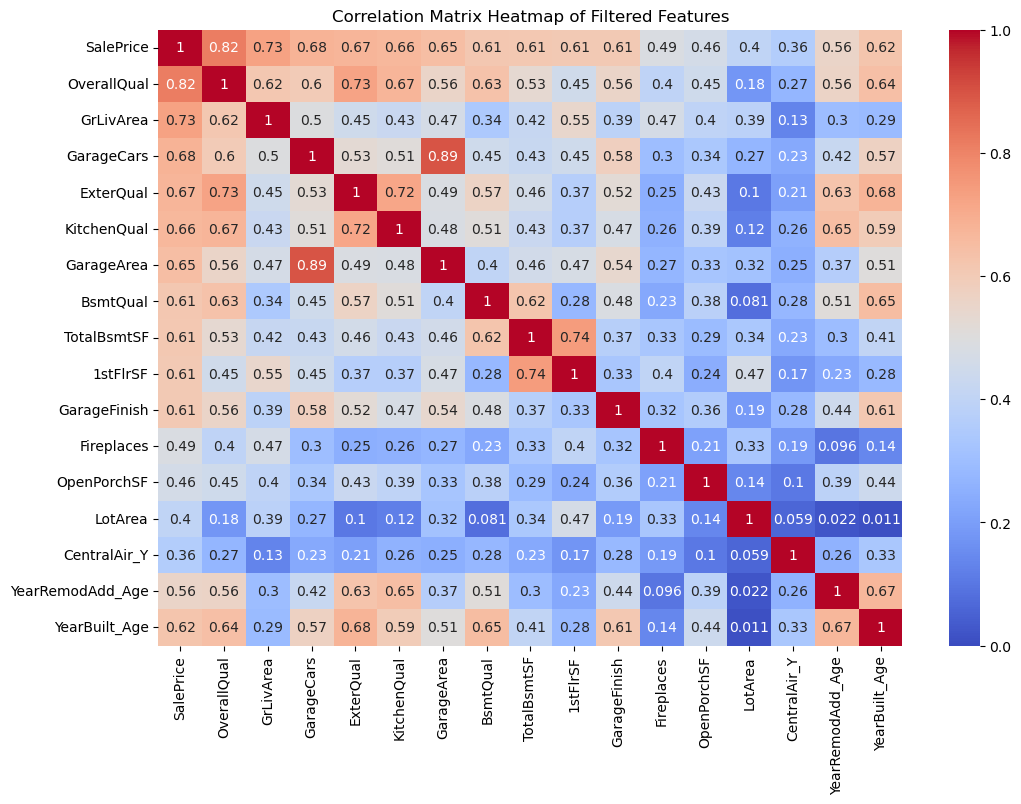

In [352]:
# Get the subset of the dataframe with only the filtered features
filtered_data = data_copy[filtered_features['Feature']]

# Calculate the correlation matrix for the selected features
filtered_corr_matrix = filtered_data.corr().abs()

# Set a threshold for high correlation between features
multicollinearity_threshold = 0.65

# Identify pairs of features with high correlation
high_corr_pairs = [
    (i, j) for i in filtered_corr_matrix.columns for j in filtered_corr_matrix.columns
    if i != j and filtered_corr_matrix.loc[i, j] > multicollinearity_threshold
]

# Display the pairs of features with high correlation
print("Pairs of features with high correlation:")
for pair in high_corr_pairs:
    corr_value = filtered_corr_matrix.loc[pair[0], pair[1]]
    print(f"{pair[0]} and {pair[1]}: {corr_value}")


# Generate a heatmap for the correlation matrix of filtered features and SalePrice
filtered_features_SalePrice_data = data_copy[['SalePrice'] + list(filtered_features['Feature'])]
filtered_features_SalePrice__corr_matrix = filtered_features_SalePrice_data.corr().abs()
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_features_SalePrice__corr_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title('Correlation Matrix Heatmap of Filtered Features')
plt.show()


In [353]:
# Define the features to drop due to multicollinearity
features_to_drop = ['ExterQual', 'KitchenQual', 'BsmtQual', 'GarageArea']

# Get the list of filtered features
filtered_features_list = list(filtered_features["Feature"])

# Remove the features to drop from the filtered features list
final_selected_features_list = [feature for feature in filtered_features_list if feature not in features_to_drop]

# Filter the original dataframe to include only the final selected features and SalePrice
final_selected_features_data_copy = data_copy[final_selected_features_list + ['SalePrice']]

# Display the final selected features dataframe
print("Final Selected Features Training Dataset:")
display(final_selected_features_data_copy.tail())

# Filter the original dataframe to include only the final selected features and SalePrice
final_selected_features_df_test = df_test[final_selected_features_list]

# Display the final selected features dataframe
print("Final Selected Features Testing Dataset:")
display(final_selected_features_df_test.head())

Final Selected Features Training Dataset:


,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,GarageFinish,Fireplaces,OpenPorchSF,LotArea,CentralAir_Y,YearRemodAdd_Age,YearBuilt_Age,SalePrice
Id,,,,,,,,,,,,,
1456,5,0.418011,2,-0.179052,-0.457561,2,1,0.642433,-0.265707,1,-0.617322,-0.926654,0.137442
1457,5,1.108418,2,1.099243,1.944554,1,2,-1.073091,0.723427,1,0.159172,0.010987,0.588901
1458,6,1.472270,1,0.270744,0.238154,2,2,0.831095,-0.009046,1,-1.201298,1.025545,1.169331
1459,4,-0.852431,1,0.105985,-0.067110,1,0,-1.073091,0.130437,1,-0.315607,0.819705,-0.385673
1460,4,-0.394604,1,0.497834,0.412017,3,0,0.889818,0.173869,1,1.030542,0.425657,-0.291728


Final Selected Features Testing Dataset:


,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,GarageFinish,Fireplaces,OpenPorchSF,LotArea,CentralAir_Y,YearRemodAdd_Age,YearBuilt_Age
Id,,,,,,,,,,,,
1461,4,-1.447569,1,-0.317919,-0.607309,1,0,-1.095404,0.546363,1,1.084490,0.559264
1462,5,-0.191399,1,0.660578,0.594420,1,0,0.550260,1.048317,1,1.165675,0.638760
1463,4,0.450754,2,-0.212531,-0.499373,3,1,0.523302,0.969607,1,-0.520748,-0.789249
1464,5,0.402112,2,-0.217087,-0.506003,3,1,0.550260,0.197716,1,-0.520748,-0.844987
1465,7,-0.310394,2,0.557659,0.480938,2,0,0.948282,-1.148523,1,-0.134351,-0.533786


In [354]:
final_selected_features_data_copy.std()

OverallQual         1.384297
GrLivArea           1.000345
GarageCars          0.748251
TotalBsmtSF         1.000345
1stFlrSF            1.000345
GarageFinish        0.893662
Fireplaces          0.645440
OpenPorchSF         1.000345
LotArea             1.000345
CentralAir_Y        0.247363
YearRemodAdd_Age    1.000345
YearBuilt_Age       1.000345
SalePrice           1.000345
dtype: float64

In [355]:
final_selected_features_data_copy.var()

OverallQual         1.916278
GrLivArea           1.000689
GarageCars          0.559880
TotalBsmtSF         1.000689
1stFlrSF            1.000689
GarageFinish        0.798632
Fireplaces          0.416593
OpenPorchSF         1.000689
LotArea             1.000689
CentralAir_Y        0.061188
YearRemodAdd_Age    1.000689
YearBuilt_Age       1.000689
SalePrice           1.000689
dtype: float64

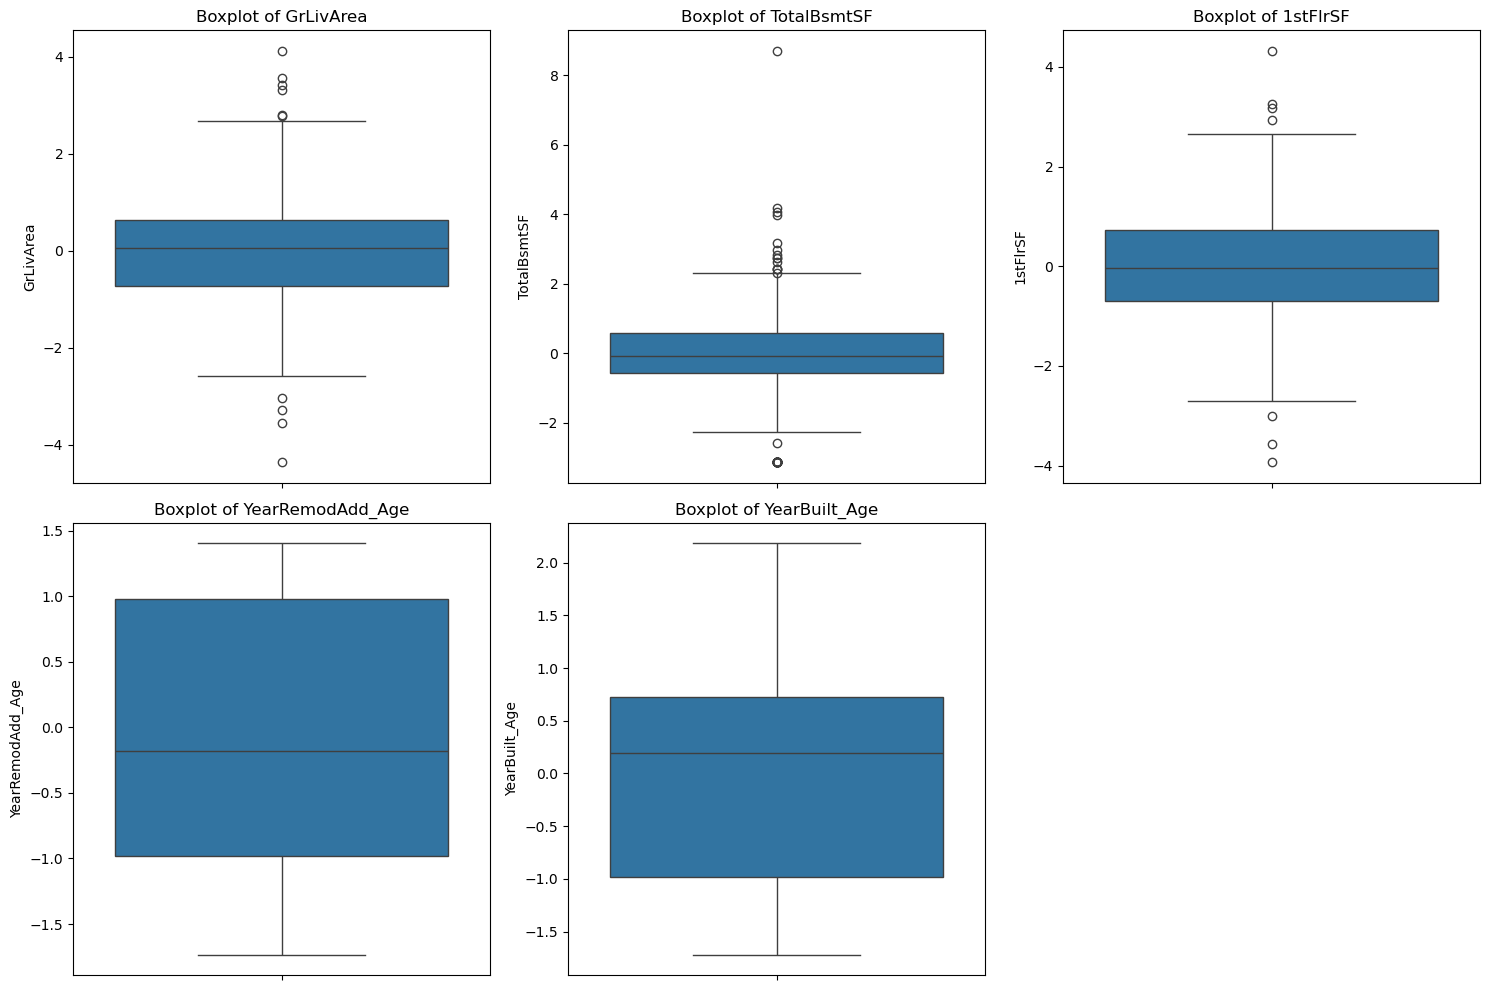

In [356]:
# Plotting boxplots for numerical features to identify outliers
num_features = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'YearRemodAdd_Age', 'YearBuilt_Age']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data_copy[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

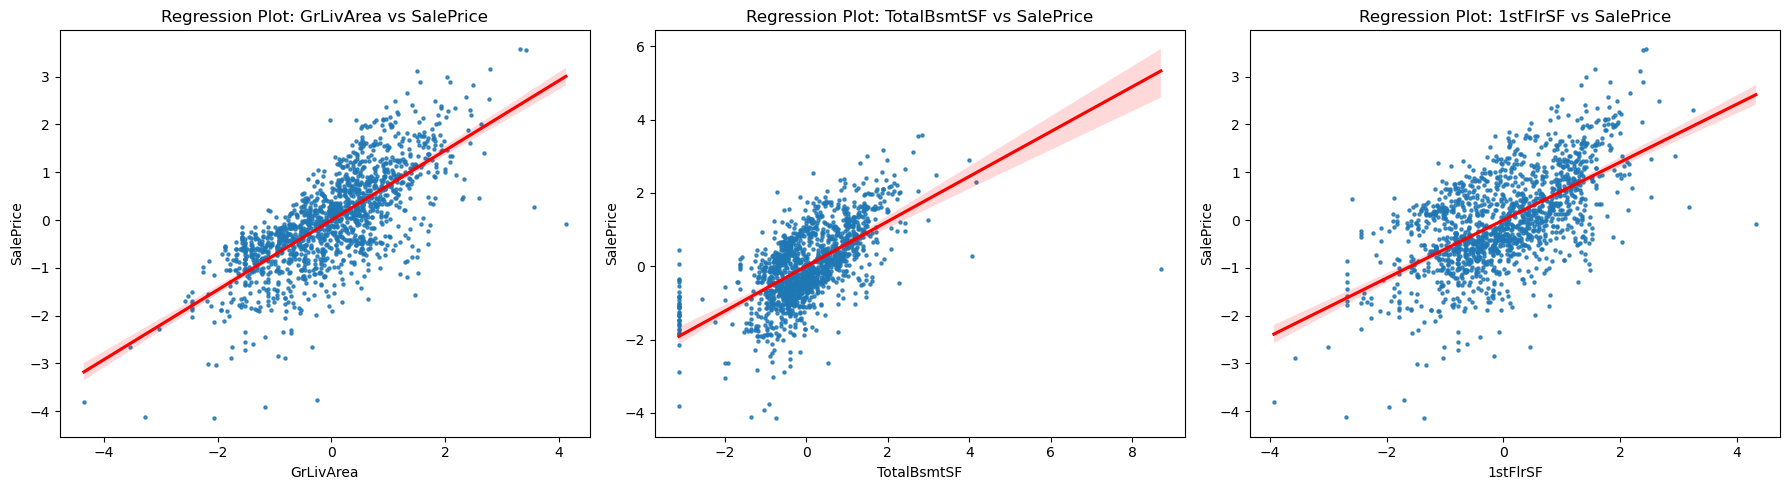

In [357]:
# Features and target variable
features = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF']
target = 'SalePrice'

# Plotting regplots
plt.figure(figsize=(18, 5))

for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.regplot(x=final_selected_features_data_copy[feature], y=final_selected_features_data_copy[target], scatter_kws={"s": 5}, line_kws={"color": "red"})
    plt.title(f'Regression Plot: {feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)

plt.tight_layout()
plt.show()

In [363]:
# Confirm the Shape before
print(f"Shape Before: {final_selected_features_data_copy.shape[0]}")

# Identify the outliers
outliers = []

# Highest GrLivArea
outliers.extend(final_selected_features_data_copy.nlargest(2, 'GrLivArea').index)

# Highest TotalBsmtSF
outliers.append(final_selected_features_data_copy['TotalBsmtSF'].idxmax())

# Highest 1stFlrSF
outliers.append(final_selected_features_data_copy['1stFlrSF'].idxmax())

# Remove duplicates from the outliers list
outliers = list(set(outliers))
print(outliers)

# Remove outliers from the dataframe
final_selected_features_data_copy = final_selected_features_data_copy.drop(outliers)

# Confirm the removal of outliers
print(f"Shape After: {final_selected_features_data_copy.shape[0]}")

Shape Before: 1452
[1299, 524]
Shape After: 1450


In [359]:
# import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import LabelEncoder

# # Separate features and target
# X_train = data_copy.drop('SalePrice', axis=1)
# y_train = data_copy['SalePrice']

# # One-hot encode categorical features
# # X_train_encoded = pd.get_dummies(X_train)

# # Label encode categorical features
# X_train_encoded = X_train.copy()
# label_encoder = LabelEncoder()
# for col in X_train_encoded.columns:
#     if X_train_encoded[col].dtype == 'object':
#         X_train_encoded[col] = label_encoder.fit_transform(X_train_encoded[col])

# # Impute missing values
# imputer = SimpleImputer(strategy='mean')
# X_train_imputed = imputer.fit_transform(X_train_encoded)

# # Feature importance using Random Forest
# rf_model = RandomForestRegressor()
# rf_model.fit(X_train_imputed, y_train)
# importances = rf_model.feature_importances_
# feature_importance = pd.Series(importances, index=X_train_encoded.columns).sort_values(ascending=False)

# # Select top 20 features from Random Forest
# top_features_rf = feature_importance.head(20).index

# # Recursive Feature Elimination (RFE)
# model = LinearRegression()
# rfe = RFE(model, n_features_to_select=20)
# fit = rfe.fit(X_train_imputed, y_train)
# top_features_rfe = X_train_encoded.columns[fit.support_]

# # Combine selected features
# selected_features = list(set(top_features_rf) | set(top_features_rfe))

# # Print selected features
# print("Selected Features:", selected_features)


In [360]:
# import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import LabelEncoder

# # Separate features and target
# X_train = data_copy.drop('SalePrice', axis=1)
# y_train = data_copy['SalePrice']

# # One-hot encode categorical features
# # X_train_encoded = pd.get_dummies(X_train)

# # Label encode categorical features
# X_train_encoded = X_train.copy()
# label_encoder = LabelEncoder()
# for col in X_train_encoded.columns:
#     if X_train_encoded[col].dtype == 'object':
#         X_train_encoded[col] = label_encoder.fit_transform(X_train_encoded[col])

# # Impute missing values
# imputer = SimpleImputer(strategy='mean')
# X_train_imputed = imputer.fit_transform(X_train_encoded)

# # Feature importance using Random Forest
# rf_model = RandomForestRegressor()
# rf_model.fit(X_train_imputed, y_train)
# importances = rf_model.feature_importances_
# feature_importance = pd.Series(importances, index=X_train_encoded.columns).sort_values(ascending=False)

# # Select top 20 features from Random Forest
# top_features_rf = feature_importance.head(20).index

# # Recursive Feature Elimination (RFE)
# model = LinearRegression()
# rfe = RFE(model, n_features_to_select=20)
# fit = rfe.fit(X_train_imputed, y_train)
# top_features_rfe = X_train_encoded.columns[fit.support_]

# # Combine selected features
# selected_features = list(set(top_features_rf) | set(top_features_rfe))

# # Print selected features
# print("Selected Features:", selected_features)


In [361]:
# # Separate features and target
# # X_train = data_copy.drop('SalePrice', axis=1)
# # y_train = data_copy['SalePrice']

# # One-hot encode categorical features
# # X_train_encoded = pd.get_dummies(X_train)

# # Combine the encoded features with the target variable
# data_combined = pd.concat([X_train_encoded, y_train], axis=1)

# # Calculate the correlation matrix
# correlation_matrix = data_combined.corr()

# # Get the correlation of features with 'SalePrice'
# correlation_with_saleprice = correlation_matrix['SalePrice']

# # Filter the correlation to only include the selected features
# correlation_selected_features = correlation_with_saleprice[selected_features]

# # Sort the correlation values in descending order
# correlation_selected_features_sorted = correlation_selected_features.sort_values(ascending=False)

# # Display the sorted correlation values
# print(correlation_selected_features_sorted)


In [362]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Select the top 20 features based on correlation with SalePrice
# top_features = correlation_selected_features_sorted.index

# # Extract the correlation matrix for these features
# corr_top_features = data_combined[top_features].corr()

# # Create a heatmap
# plt.figure(figsize=(25, 25))
# sns.heatmap(corr_top_features, annot=True, cmap='viridis', vmin=-1, vmax=1, fmt='.2f', linewidths=0.1, annot_kws={"size": 8}, square=True)
# plt.title('Correlation Heatmap of Top 20 Features with SalePrice')
# plt.show()